In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the data
weather_actual = pd.read_csv('weather_actuals.csv',index_col=0)
weather_forecast = pd.read_csv('weather_forecast.csv',index_col=0)
power_data = pd.read_csv('power_actual.csv',index_col=0)

In [3]:
weather_actual.head()

plant_id      datetime_utc    datetime_local  cloud_cover  \
0         1  30-09-2017 18:30  01-10-2017 00:00          0.0   
1         1  30-09-2017 19:30  01-10-2017 01:00          0.0   
2         1  30-09-2017 20:30  01-10-2017 02:00          0.0   
3         1  30-09-2017 21:30  01-10-2017 03:00          0.0   
4         1  30-09-2017 22:30  01-10-2017 04:00          0.0   

   apparent_temperature  temperature  humidity  dew_point  wind_bearing  \
0                 26.52           26         1      19.46           308   
1                 28.78           27         1      20.06         -9999   
2                 26.58           26         1      19.97         -9999   
3                 23.84           23         1      18.66           270   
4                 24.13           24         1      17.84         -9999   

   wind_speed  ...  precip_accumulation  precip_intensity  precip_probability  \
0        0.83  ...              -9999.0           -9999.0             -9999.0   
1    -9999.00  ...              -9999.0           -9999.0             -9999.0   
2    -9999.00  ...              -9999.0           -9999.0             -9999.0   
3        0.45  ...              -9999.0           -9999.0             -9999.0   
4    -9999.00  ...              -9999.0           -9999.0             -9999.0   

   precip_type  visibility           sunrise            sunset         icon  \
0         rain        3.57  01-10-2017 00:52  01-10-2017 12:45  clear-night   
1         rain        3.06  01-10-2017 00:52  01-10-2017 12:45          fog   
2         rain        3.06  01-10-2017 00:52  01-10-2017 12:45          fog   
3         rain        3.56  01-10-2017 00:52  01-10-2017 12:45  clear-night   
4         rain        3.06  01-10-2017 00:52  01-10-2017 12:45          fog   

   summary        updated_at  
0    Clear  16-07-2019 16:37  
1    Foggy  16-07-2019 16:37  
2    Foggy  16-07-2019 16:37  
3    Clear  16-07-2019 16:37  
4    Foggy  16-07-2019 16:37  

[5 rows x 30 columns]

In [4]:
power_data.head()

datetime  ghi  gti  power
0  01-10-2017 00:00  0.0  0.0    0.0
1  01-10-2017 00:15  0.0  0.0    0.0
2  01-10-2017 00:30  0.0  0.0    0.0
3  01-10-2017 00:45  0.0  0.0    0.0
4  01-10-2017 01:00  0.0  0.0    0.0

In [5]:
weather_actual.shape

(13619, 30)

In [6]:
power_data.shape

(70080, 4)

In [7]:
weather_actual.describe().loc['mean'] #we can see that there are many columns who has significant missing data.Some columns has false value -9999


plant_id                   1.000000
cloud_cover             -314.005310
apparent_temperature      25.944639
temperature               24.498054
humidity                   0.537411
dew_point                 11.924626
wind_bearing            -498.677363
wind_speed              -540.808704
wind_chill             -9999.000000
wind_gust              -2393.184251
heat_index             -9999.000000
pressure                -733.594065
qpf                    -9999.000000
uv_index               -2394.989280
snow                   -9999.000000
pop                    -9999.000000
fctcode                -9999.000000
ozone                  -2187.730797
precip_accumulation    -9999.000000
precip_intensity       -2396.367775
precip_probability     -2396.398081
visibility              -117.086149
Name: mean, dtype: float64

In [8]:
weather_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   plant_id              648 non-null    int64  
 1   datetime_utc          648 non-null    object 
 2   datetime_local        648 non-null    object 
 3   cloud_cover           648 non-null    float64
 4   apparent_temperature  648 non-null    float64
 5   temperature           648 non-null    int64  
 6   humidity              648 non-null    int64  
 7   dew_point             648 non-null    float64
 8   wind_bearing          648 non-null    int64  
 9   wind_speed            648 non-null    float64
 10  wind_chill            0 non-null      float64
 11  wind_gust             648 non-null    float64
 12  heat_index            0 non-null      float64
 13  pressure              648 non-null    float64
 14  qpf                   0 non-null      float64
 15  uv_index              6

# Removing the features whose data is missing significantly.

In [9]:
#Removing the features whose data is missing significantly.
null_columns=weather_actual.columns[weather_actual.isnull().any()]
weather_actual[null_columns].isnull().sum()

wind_chill             9875
heat_index             9875
qpf                    9875
snow                   9875
pop                    9875
fctcode                9875
precip_accumulation    9875
precip_type            7129
dtype: int64

In [10]:
weather_actual = weather_actual.drop(null_columns,axis=1)

In [11]:
#Removing the same features from weather_forecast data
weather_forecast = weather_forecast.drop(null_columns,axis=1)

# Replacing the incorrect value -9999 present in the actual data with other values

In [12]:
#Replacing -9999 with NaN values
weather_actual.replace(to_replace = -9999 , value =np.NaN,inplace=True)

In [13]:
#making the list of columns that has NaN value
incorrect_value_columns = weather_actual.columns[weather_actual.isna().any()].tolist()

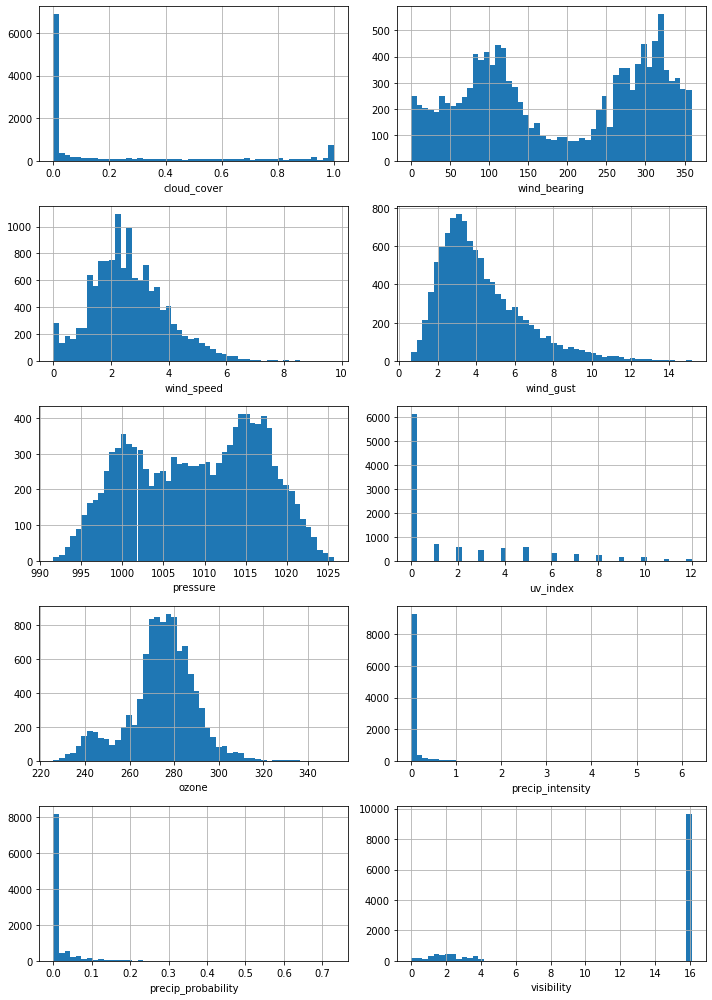

In [14]:
#Checking the distribution of the columns having incorrect data
j = 1
for i in incorrect_value_columns:
    plt.subplot(5,2,j) 
    weather_actual[i].hist(bins=50, figsize=(10,14))
    plt.xlabel(i)
    plt.tight_layout()
    j +=1

In [15]:
#Interpolate the incorrect values using linear method.
#Have tried various method. 
#In this method the distribution of the data didnt change.

weather_actual[incorrect_value_columns] = weather_actual[incorrect_value_columns].interpolate(method = 'linear', limit_direction = 'backward')


In [16]:
#All the null value from the dataset is removed and incorrected replaced
weather_actual.isnull().sum()

plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
dtype: int64

In [17]:
weather_actual.shape

(13619, 22)

# Detecting and Handling Outliers in weather actual data

In [18]:
weather_actual.columns

Index(['plant_id', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'sunrise', 'sunset', 'icon', 'summary', 'updated_at'],
      dtype='object')

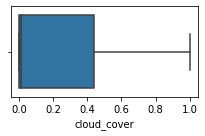

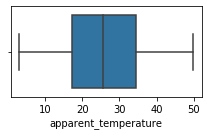

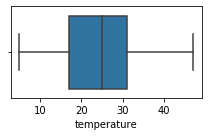

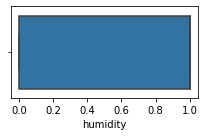

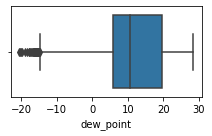

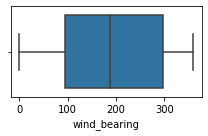

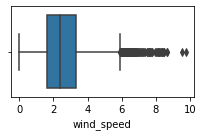

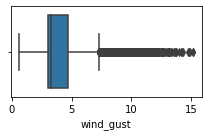

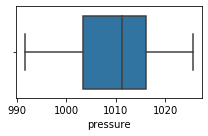

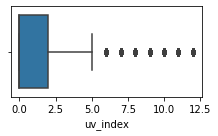

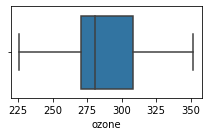

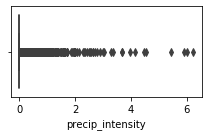

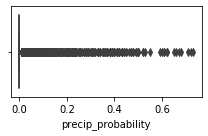

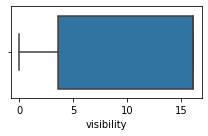

In [19]:
#Plotting the boxplot to check the outliers
col = ['cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility']
j = 0
for i in col:
    #j = j +1
    plt.figure(figsize=(3,2))
    sns.boxplot(weather_actual[i])
    plt.xlabel(i)
    plt.tight_layout()
    

In [20]:
# #From Boxplot we can see that dew_point,wind_speed,wind_gust,uv_index,precip_intensity,precip_probability have outliers
## precip_intensity and precip_probability feature has 99.3% value around 0. So IQR for these features will be 0. We cannot cap al the values to 0
# so we will either remove the that values from the dataset after merging weather_actual with power_data or we will keep it.

col_with_outliers = ['dew_point','wind_speed', 'wind_gust','uv_index']
Q1 = weather_actual[col_with_outliers].quantile(0.25)
Q3 = weather_actual[col_with_outliers].quantile(0.75)
IQR = Q3 - Q1


#Only dew_point features has low outliers. So capping the Q1 value of dew_point feature to its low outliers.
IQR_dew_point = Q1.loc['dew_point'] - 1.5 * IQR.loc['dew_point']
weather_actual['dew_point'].loc[weather_actual['dew_point'] <= IQR_dew_point] = IQR_dew_point

#Now capping the value of other features having high outliers.

for i in col_with_outliers:
    IQR1 = Q3.loc[i] + 1.5*IQR.loc[i]
    weather_actual[i].loc[weather_actual[i] >= IQR1] = IQR1
    #print(IQR)
    
    


C:\Users\Ketan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Checking the power data

In [21]:
power_data.isnull().sum()

datetime        0
ghi         35040
gti         35040
power           0
dtype: int64

In [22]:
#Since ghi and gti have missing value, dropping both columns
power_data.drop(['ghi','gti'],axis =1 ,inplace=True)

In [23]:
power_data.describe()

power
count  70080.000000
mean      28.612915
std      498.795887
min        0.000000
25%        0.000000
50%        0.000000
75%        5.540000
max    16172.040000

In [24]:
#All the values in the weather actual data is given hourly whereas in power data the power is given in every 15 min
#Suming the power hourwise

power_data['datetime'] = pd.to_datetime(power_data['datetime'])
power_data['hour'] = power_data['datetime'].dt.hour
#power_data['min'] = power_data['datetime'].dt.minute
power_data['date'] = power_data['datetime'].dt.date

power_data = power_data.groupby(['date','hour'],sort=False).power.sum().to_frame().reset_index()

<!-- #Between 01/10/2017 to 30/09/2019 there are 730 days. After grouping the dates the total number of expected rows and actual rows are same.
#730 * 24 = 17520
#That means weather data  has some missing dates or rows.
#Total number of rows missing = 17520 - 13619 = 3901
#Now there can be two possibilities of missing data : 1) Whole day data is missing or 2) Partial day data is missing
#For Whole day data we will compare the dates present in power data and weather actual data, and we will make a list of dates which are missing from the weather data.
#For Partial day data missing we will check the value count of the date. It should be 24. -->

In [25]:
#when we check the  shape of the power data there are 17520 rows and in weather actual data there are 13619 rows.
#That means in weather actual data some value dates are missing.In power data for 730 days the rows should be 17520 which is correct
#Missing rows = 17520 - 13619 = 3901

power_data.shape


(17520, 3)

#From 01-10-2017 to 30-09-2019 there are 730 days. So the total column we should expect in the dataset: 730 * 24 = 17,520.
#In power data we have 17520 row. That means we have no missing date in power data.
#But in weather data there are 13619 rows which means there are some missing dates in it.
#Total number of missing rows : 17520 - 13619 = 3901.
#There are two possibility for these missing rows: 1) Either whole day data is missing 2) Partial day data is missing.
#1) For whole day data missing we will compare the dates present in the power data and weather data. We will make the list of missing dates.
#2) For Partial day data missing, we will check the value counts of the date. It should be 24. IF not we will add these dates to missing dates. And for keeping the dates similar in both dataset, we will remove these missing dates from weather actual data also.
#We will then drop these dates from the power data, in order to make dates present in power data and weather data same.


In [26]:
#Comparing the dates in power data and weather data 
#Making a list of the dates that are not present in weather data

weather_actual['datetime_local'] = pd.to_datetime(weather_actual['datetime_local'])
weather_actual['date'] = weather_actual['datetime_local'].dt.date
missing_dates = power_data.date[~power_data.date.isin(weather_actual.date)]
missing_dates = missing_dates.unique()

In [27]:
#Checking the value count of all the days in weather data. If it is not 24 then storing it in one variable. So that we can remove entire date data.

Missing_hour_data_date = (weather_actual['date'].value_counts() != 24)[(weather_actual['date'].value_counts() != 24)==True].index

In [28]:
#Removing the dates from the weather actual data whose whole day data is missing

Missing_hour_data_date = pd.Series(Missing_hour_data_date)
weather_actual = weather_actual[weather_actual['date'] != Missing_hour_data_date[0]].reset_index(drop =True)


In [29]:
weather_actual.shape

(13608, 23)

In [30]:
#Appending the missing hour data date to missing dates. We will remove these dates from power data.
missing_dates = np.append(missing_dates, np.array(Missing_hour_data_date))

In [31]:
#We will remove missing dates from the power data
power_data = power_data[~power_data['date'].isin(missing_dates)].reset_index(drop=True)

In [32]:
weather_actual.shape

(13608, 23)

In [33]:
#Checking the shape and wether dates in both dataset are same or not
print('Shape of weather_data', weather_actual.shape)
print('Shape of power_data', power_data.shape)
print(power_data.date[~power_data.date.isin(weather_actual.date)])


Shape of weather_data (13608, 23)
Shape of power_data (13608, 3)
Series([], Name: date, dtype: object)


EDA on power data

# Detecting and Handling Outliers in power data

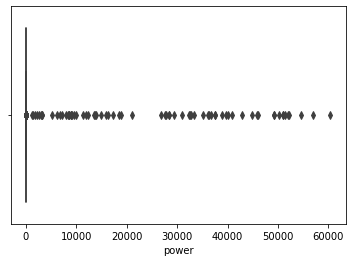

In [34]:
#Checking for outliers.
sns.boxplot(power_data['power'])

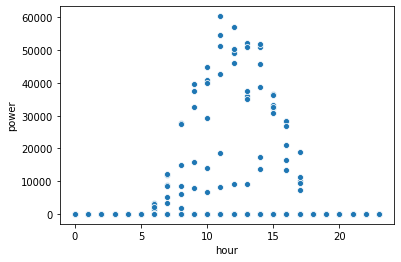

In [35]:
sns.scatterplot(x='hour',y='power',data=power_data)

From the boxplot and scatter plot we can say that there are extreme high outliers present in the power data.

From the scatter plot we can say that high power values (outliers) are present during the day time ( ie. between 6am to 4pm ) and we can cap these values to Q3 + 1.5 IQR. 

Instead we will drop these dates data from both dataset to avoid model to learn from incorrect values.

In [36]:
#The outliers are extreme high and every few. So we will remove the dates whose power values are more (Q3 + 1.5 IQR)  

Q1 = power_data['power'].quantile(0.25)
Q3 = power_data['power'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
print('Upper_limit is', upper_limit)


Upper_limit is 61.568749999999994


In [37]:
#collecting the dates whose power values are wrong

incorrect_power_date = power_data[power_data['power'] > upper_limit]['date'].unique()

In [38]:
#Removing the incorrect power value data from both dataset

power_data = power_data[~power_data['date'].isin(incorrect_power_date)].reset_index()
weather_actual = weather_actual[~weather_actual['date'].isin(incorrect_power_date)].reset_index(drop=True)

In [39]:
#Checking the shape and wether dates in both dataset are same or not
print('Shape of weather_data', weather_actual.shape)
print('Shape of power_data', power_data.shape)
#print(power_data.date[~power_data.date.isin(weather_actual.date)])


Shape of weather_data (11832, 23)
Shape of power_data (11832, 4)


# Merging the power column to weather actual dataset

In [40]:
weather_actual = weather_actual.merge(power_data['power'], right_index=True,left_index=True)

In [41]:
#Checking the null values
weather_actual.isnull().sum()

plant_id                0
datetime_utc            0
datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
updated_at              0
date                    0
power                   0
dtype: int64

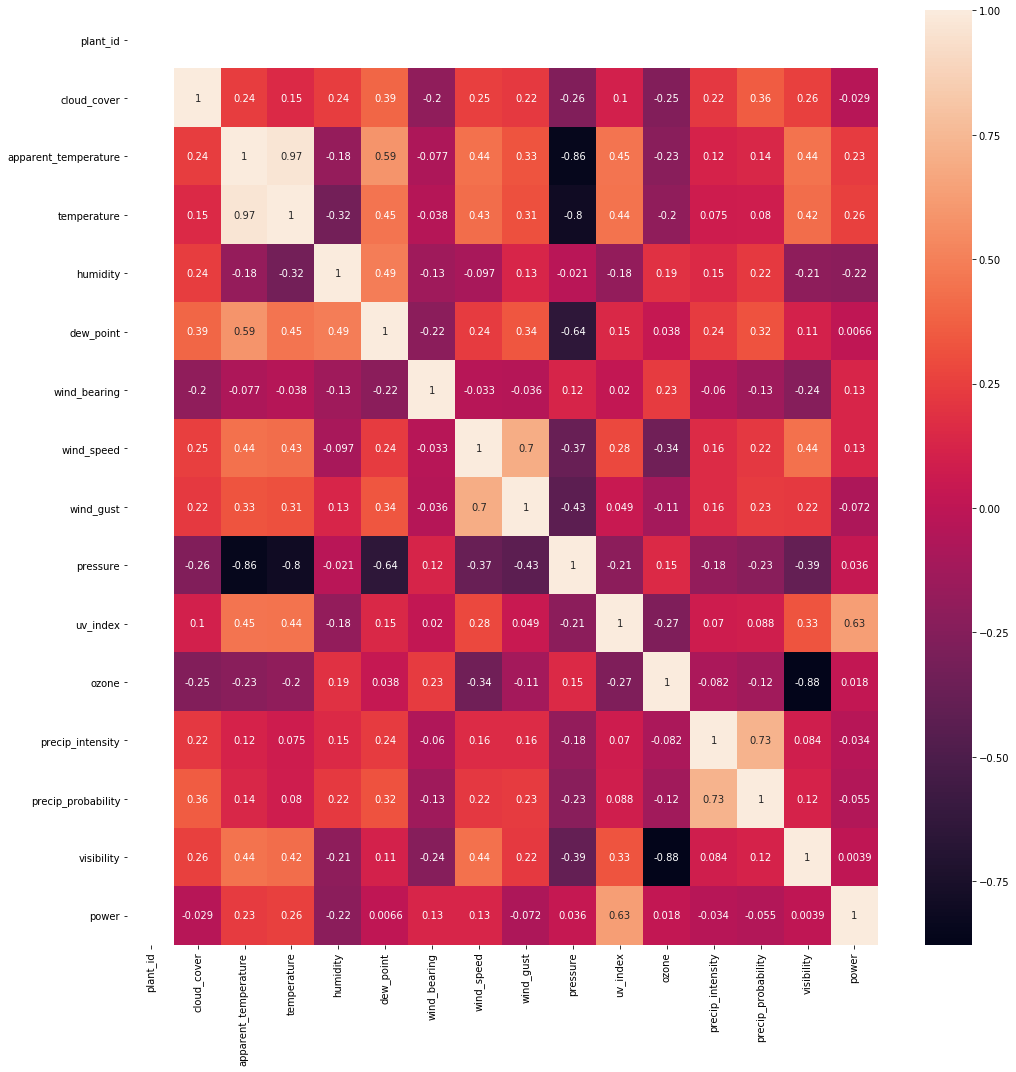

In [42]:
#Checking the correlation between features and target variable
#There is nearly 0 correltaion between the features and target variables.

plt.subplots(figsize=(15,15)) 
sns.heatmap(weather_actual.corr(), annot=True)
plt.tight_layout()

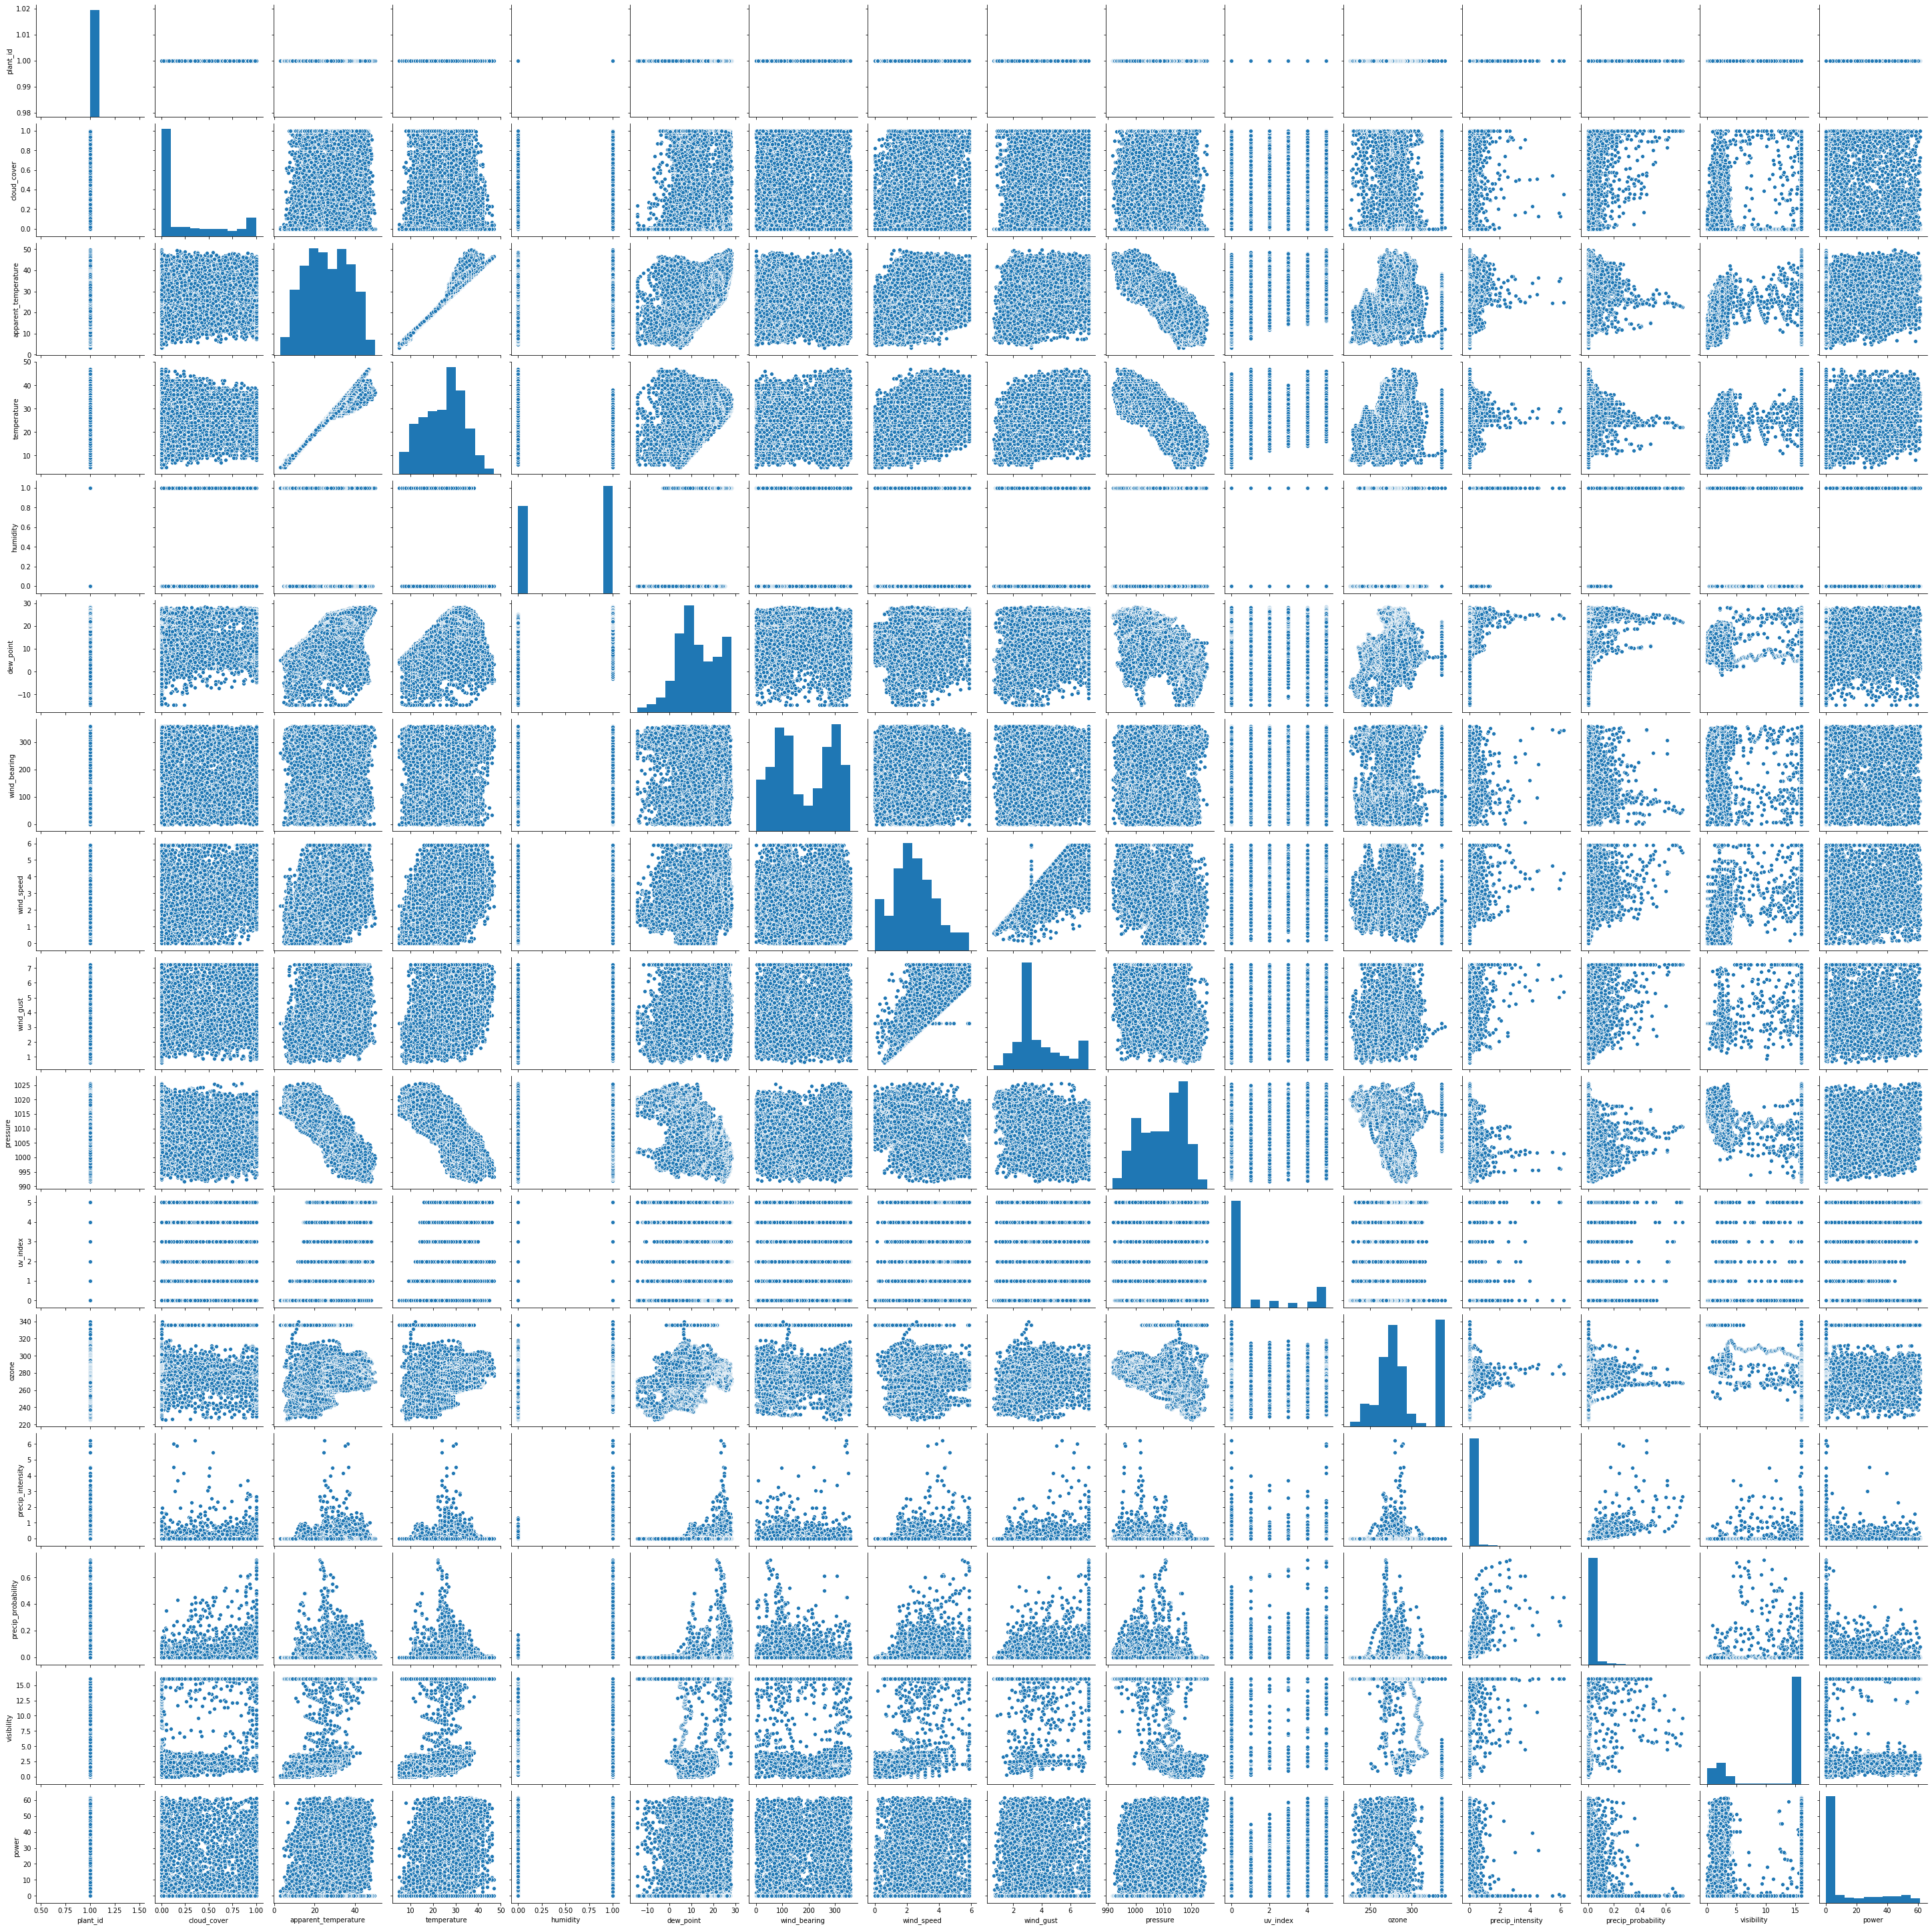

In [43]:
sns.pairplot(weather_actual)

#Scatterplots tell us that there is no significant relations between features and target variable.
#Very few features are correlated with each other. 

Feature Engineering

Creating a function for removing irrelavant features and adding some new feature. 

In [44]:
weather_actual.columns

Index(['plant_id', 'datetime_utc', 'datetime_local', 'cloud_cover',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'precip_intensity', 'precip_probability', 'visibility',
       'sunrise', 'sunset', 'icon', 'summary', 'updated_at', 'date', 'power'],
      dtype='object')

In [45]:
#MRemoving date column to make the features between weather actual and weather forecast same.
weather_actual = weather_actual.drop('date',axis=1)

In [46]:
def feature_eng(weather_actual):
    
    #dropping all the irrelevant columns first
    weather_actual.drop(['plant_id','datetime_utc','updated_at','apparent_temperature','summary'],axis=1,inplace=True)

    #Making the list of timestamp columns to convert them into datetime format and apply some changes
    
    time_col_lst = ['datetime_local','sunrise','sunset']
    
    for i in time_col_lst:
        weather_actual[i] = pd.to_datetime(weather_actual[i])
    
    #Instead of whole timestamp, we can use only hour information
    weather_actual['hour'] = weather_actual['datetime_local'].dt.hour  
   
    #Calculating the sun duration in minutes. One column instead of two.
    weather_actual['sun_duration'] = (weather_actual['sunset'] - weather_actual['sunrise'])/np.timedelta64(1,'m')
    
    #Droping the time column list
    weather_actual.drop(time_col_lst,axis=1,inplace =True)
    
    #Label Encoding icon feature
    weather_actual['icon'] = weather_actual['icon'].astype('category')
    weather_actual['icon'] = weather_actual['icon'].cat.codes
    
    return (weather_actual)
    

In [47]:
#Applying feature engineering on the weather actual data
weather_actual =feature_eng(weather_actual)

In [48]:
#Checking the columns
weather_actual.columns

Index(['cloud_cover', 'temperature', 'humidity', 'dew_point', 'wind_bearing',
       'wind_speed', 'wind_gust', 'pressure', 'uv_index', 'ozone',
       'precip_intensity', 'precip_probability', 'visibility', 'icon', 'power',
       'hour', 'sun_duration'],
      dtype='object')

# Predictive Model

Applying few ML models and checking their performance on test data. Based on it we will select best performing model for predicting weather forecast data

Spliting the data

In [49]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [50]:
y = weather_actual['power']
X = weather_actual.drop(['power'],axis=1)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

Linear Regression

In [52]:
#Importing and fitting Linear Regression Model

from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [53]:
#List of the coefficients for each features

coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
print (coeff_df)
print('lm intercept',lm.intercept_)

                    Coefficient
cloud_cover            2.375882
temperature            0.858394
humidity              -2.364003
dew_point              0.189586
wind_bearing           0.005451
wind_speed             1.451504
wind_gust             -0.934942
pressure               0.980467
uv_index               5.837176
ozone                  0.085720
precip_intensity      -0.004780
precip_probability   -11.197083
visibility            -0.264047
icon                  -0.299580
hour                  -0.349778
sun_duration          -0.021991
lm intercept -1009.4401720230567


In [54]:
#Predicting the values for test set
y_pred_lr = lm.predict(X_test)

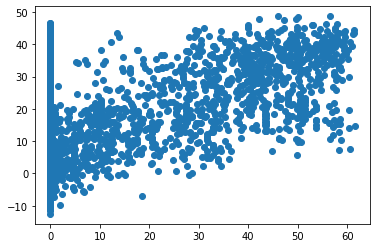

In [55]:
#Plotting the test and predicted value. To see how model performed
plt.scatter(y_test,y_pred_lr)

In [56]:
#Evaluting the model

MAE_Regression = metrics.mean_absolute_error(y_test, y_pred_lr)
MSE_Regression = metrics.mean_squared_error(y_test, y_pred_lr)
RMSE_Regression = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
print('MAE:', MAE_Regression)
print('MSE:', MSE_Regression)
print('RMSE:', RMSE_Regression)

MAE: 9.129193448129813
MSE: 163.12759954076364
RMSE: 12.772141540899225


LASSO

In [57]:
#Importing and fitting Lasso Regression Model

from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
#Predicting the values for test set
y_pred_lasso = model_lasso.predict(X_test)

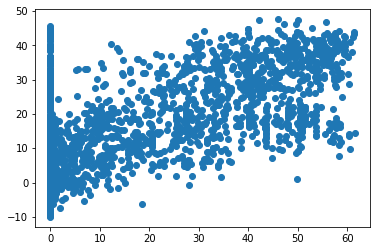

In [59]:
#Plotting the test and predicted value. To see how model performed
plt.scatter(y_test,y_pred_lasso)

In [60]:
#Evaluting the model
MAE_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = metrics.mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print('MAE:', MAE_lasso)
print('MSE:', MSE_lasso)
print('RMSE:', RMSE_lasso)

MAE: 9.281262302593717
MSE: 167.56878241888137
RMSE: 12.944836129471913


Linear Regression Using Polynomial Features

In [61]:
#Creating function so that we can test the preformance of the model for different degrees.
#After checking we got best result for degree 3

from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression_model(degree):
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)

    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))

    return (y_test_predict)

In [62]:
#Calling the function which returns predicted value
y_pred_poly = polynomial_regression_model(3)

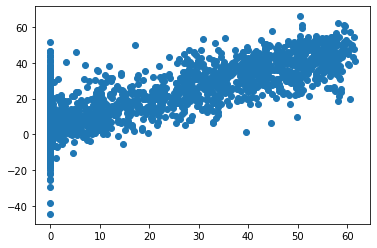

In [63]:
#Plotting the test and predicted value. To see how model performed
plt.scatter(y_test,y_pred_poly)

In [64]:
#Evaluting the model
MAE_poly = metrics.mean_absolute_error(y_test, y_pred_poly)
MSE_poly = metrics.mean_squared_error(y_test, y_pred_poly)
RMSE_poly = np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))

print('MAE:', MAE_poly)
print('MSE:', MSE_poly)
print('RMSE:', RMSE_poly)

MAE: 6.185819327449506
MSE: 83.64694936540482
RMSE: 9.145870618230111


RandomForest Reggrosor

In [65]:
#Importing and fitting RandomForestRegressor Model

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [66]:
#Predicting the values for test set
y_pred_RF = RF.predict(X_test)

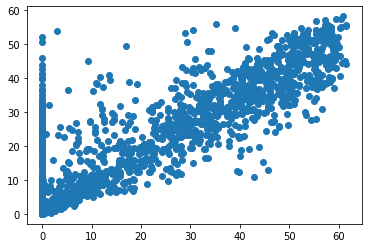

In [67]:
#Plotting the test and predicted value. To see how model performed
plt.scatter(y_test,y_pred_RF)

In [68]:
#Evaluting the model
MAE_RF = metrics.mean_absolute_error(y_test, y_pred_RF)
MSE_RF = metrics.mean_squared_error(y_test, y_pred_RF)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))

print('MAE:', MAE_RF)
print('MSE:', MSE_RF)
print('RMSE:', RMSE_RF)

MAE: 3.1802805633802818
MSE: 49.5393295920676
RMSE: 7.038418117167209


SVM Regressor

Tried predicting value using ('linear','poly','rbf') kernel. Among them 'rbf' gave the best result

In [69]:
#Importing and fitting SVR Model

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svmr_lr = make_pipeline(StandardScaler(),SVR(kernel='rbf'))
svmr_lr.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [70]:
#Predicting the values for test set
y_pred_svmr = svmr_lr.predict(X_test)

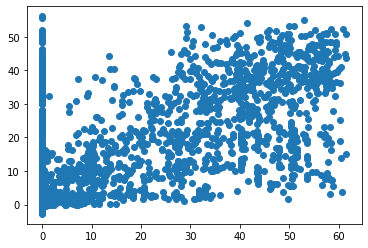

In [71]:
#Plotting the test and predicted value. To see how model performed

plt.scatter(y_test,y_pred_svmr)

In [72]:
#Evaluting the model
MAE_svr = metrics.mean_absolute_error(y_test, y_pred_svmr)
MSE_svr = metrics.mean_squared_error(y_test, y_pred_svmr)
RMSE_svr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_svmr))

print('MAE:', MAE_svr)
print('MSE:', MSE_svr)
print('RMSE:', RMSE_svr)

MAE: 6.686316296507442
MSE: 157.05418971824895
RMSE: 12.532126304751678


In [73]:
#Making a dataframe of all the scores from the model

index = ['Linear Regression','Lasso','LR using Poly Features','RandomForestRegressor','SVR']
data = { 'Mean Absolute Error' : [MAE_Regression,MAE_lasso,MAE_poly,MAE_RF,MAE_svr] ,
        'Mean Square Error' : [MSE_Regression,MSE_lasso,MSE_poly,MSE_RF,MSE_svr],
        'Root Mean Square Error': [RMSE_Regression, RMSE_lasso,RMSE_poly,RMSE_RF,RMSE_svr]}
model_score = pd.DataFrame(data , index=index)

In [74]:
model_score

Mean Absolute Error  Mean Square Error  \
Linear Regression                  9.129193         163.127600   
Lasso                              9.281262         167.568782   
LR using Poly Features             6.185819          83.646949   
RandomForestRegressor              3.180281          49.539330   
SVR                                6.686316         157.054190   

                        Root Mean Square Error  
Linear Regression                    12.772142  
Lasso                                12.944836  
LR using Poly Features                9.145871  
RandomForestRegressor                 7.038418  
SVR                                  12.532126

From the above the dataframe we can say that RandomForestRegressor gave best result. So we will use Random Forest Regressor on weather forecast data.

In [75]:
#Applying the feature eng to weather forecast data
weather_forecast = feature_eng(weather_forecast)

In [76]:
#Predicting power for the forecast data
pred_power = pd.DataFrame(RF.predict(weather_forecast))

In [77]:
#Exporting the predicted power in the excel sheet
#pred_power.to_excel('pred_power.xlsx', index=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A63326EF88>]],
      dtype=object)

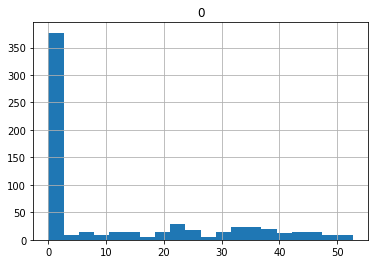

In [78]:
pred_power.hist(bins=20)